In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset 2
happiness_report = pd.read_csv("D:/Python/worldwide_happiness_report.csv")
dataset = pd.read_csv("D:/Python/covid19_Confirmed_dataset.csv")

In [3]:
happiness_report

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [4]:
# Drop Useless Columns
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [5]:
happiness_report.drop(useless_cols, axis=1, inplace = True)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [6]:
happiness_report.set_index("Country or region", inplace = True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [7]:
# aggregate the rows by country
corona_dataset_aggregated = dataset.groupby("Country/Region").sum()

In [8]:
countries = list(corona_dataset_aggregated.index)
max_infections_rates = []

for c in countries:
    max_infections_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["Max_infections_rates"] = max_infections_rates

In [9]:
# Create a new Data Frame
corona_data = pd.DataFrame(corona_dataset_aggregated["Max_infections_rates"])

In [10]:
#Join the dataset
corona_data.shape

(187, 1)

In [11]:
happiness_report.shape

(156, 4)

In [12]:
data = corona_data.join(happiness_report, how = "inner")
data

,Max_infections_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.000000,0.350,0.517,0.361,0.000
Albania,34.000000,0.947,0.848,0.874,0.383
Algeria,199.000000,1.002,1.160,0.785,0.086
Argentina,291.000000,1.092,1.432,0.881,0.471
Armenia,134.000000,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,66.589700,0.960,1.427,0.805,0.154
Vietnam,92.000000,0.741,1.346,0.851,0.543
Yemen,32.963661,0.287,1.163,0.463,0.143
Zambia,43.700000,0.578,1.058,0.426,0.431


In [13]:
data.corr()

,Max_infections_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_infections_rates,1.000000,0.251203,0.194233,0.291478,0.080998
GDP per capita,0.251203,1.000000,0.759468,0.863062,0.394603
Social support,0.194233,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.291478,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080998,0.394603,0.456246,0.427892,1.000000


In [14]:
data

,Max_infections_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.000000,0.350,0.517,0.361,0.000
Albania,34.000000,0.947,0.848,0.874,0.383
Algeria,199.000000,1.002,1.160,0.785,0.086
Argentina,291.000000,1.092,1.432,0.881,0.471
Armenia,134.000000,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,66.589700,0.960,1.427,0.805,0.154
Vietnam,92.000000,0.741,1.346,0.851,0.543
Yemen,32.963661,0.287,1.163,0.463,0.143
Zambia,43.700000,0.578,1.058,0.426,0.431


<Axes: xlabel='GDP per capita', ylabel='Max_infections_rates'>

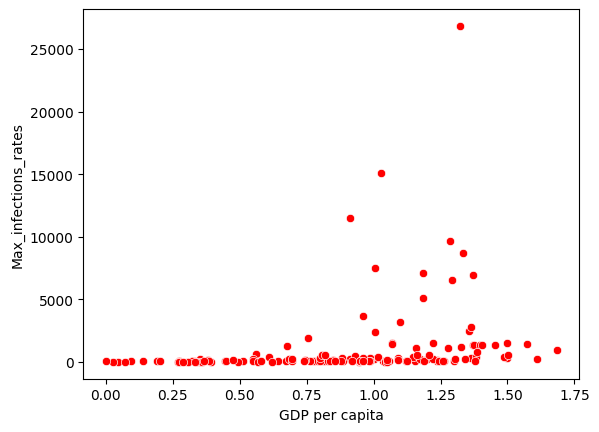

In [15]:
# Vizualisation 
x = data["GDP per capita"]
y = data["Max_infections_rates"]
sns.scatterplot(x=x, y=y, color='red')

<Axes: xlabel='GDP per capita', ylabel='Max_infections_rates'>

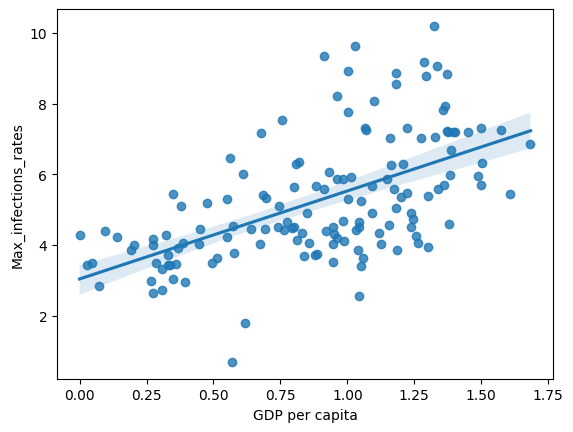

In [16]:
sns.regplot(x=x, y=np.log(y))

<Axes: xlabel='Social support', ylabel='Max_infections_rates'>

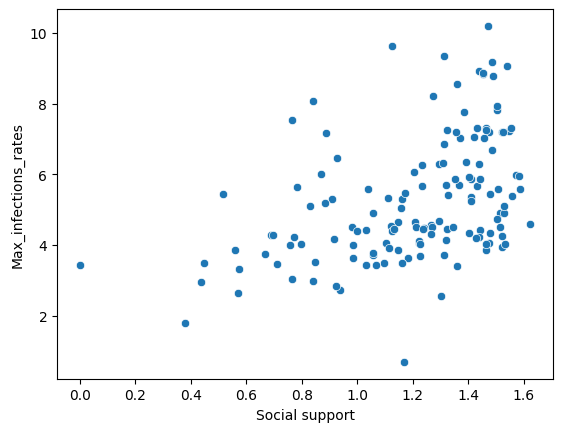

In [17]:
x = data["Social support"]
y = data["Max_infections_rates"]
sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='Social support', ylabel='Max_infections_rates'>

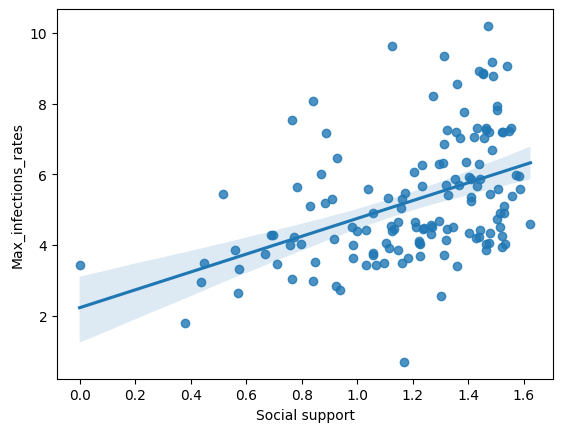

In [18]:
sns.regplot(x=x, y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='Max_infections_rates'>

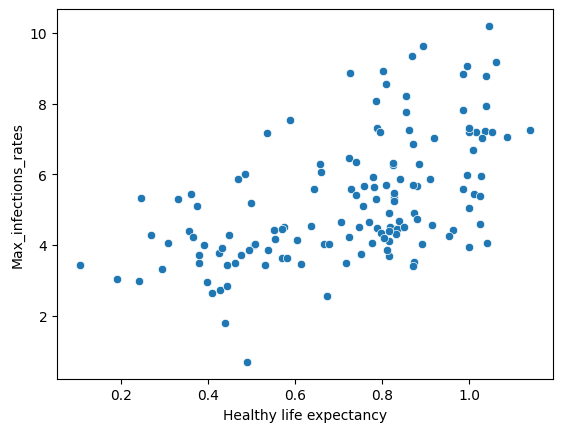

In [19]:
x = data["Healthy life expectancy"]
y = data["Max_infections_rates"]
sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='Max_infections_rates'>

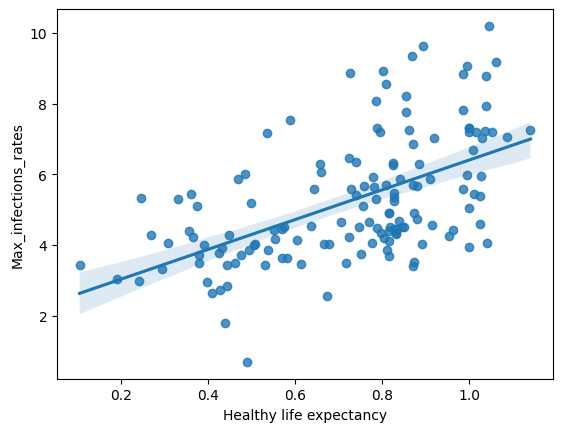

In [20]:
sns.regplot(x=x, y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='Max_infections_rates'>

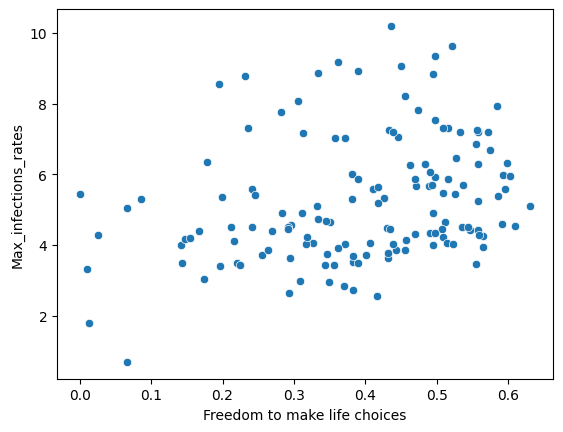

In [21]:
x = data["Freedom to make life choices"]
y = data["Max_infections_rates"]
sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='Max_infections_rates'>

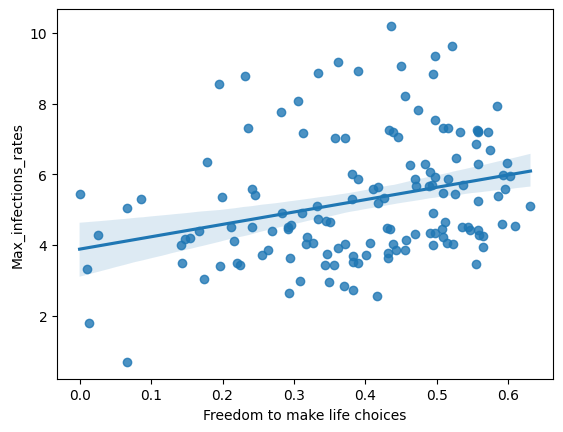

In [22]:
sns.regplot(x=x, y=np.log(y))